# Exercise 02: Classifier Comparison

In this exercise, you'll run several classifiers on the same data and compare their effectiveness.

## Installing Modules

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib seaborn pandas

## Setup

Load the pre-canned wine dataset:

In [2]:
from sklearn import datasets
dataset = datasets.load_wine()

Split test data into training/testing sets:

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], test_size=0.4, random_state=20
)

## K Nearest Neighbors

Spend a little time learning about K Nearest Neighbor (KNN) classifiers.

Once you have a handle on how they work, run the code below and inspect the results.

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.81      0.62      0.70        34
           2       0.38      0.47      0.42        17

    accuracy                           0.68        72
   macro avg       0.66      0.68      0.66        72
weighted avg       0.70      0.68      0.68        72


Confusion matrix:
[[20  0  1]
 [ 1 21 12]
 [ 4  5  8]]


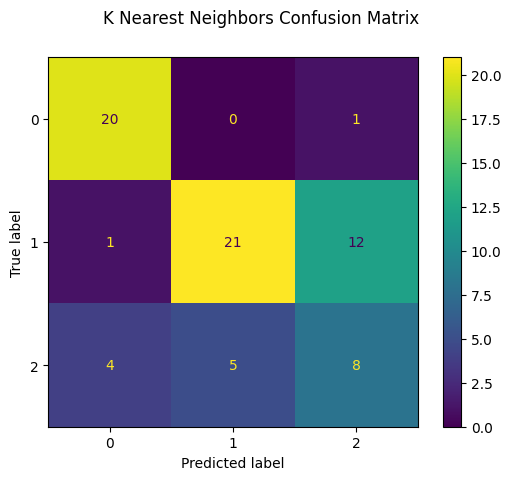

In [23]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("K Nearest Neighbors Confusion Matrix")
plt.show()

## Support Vector Machines

Spend a little time learning about support vector machine (SVM) classifiers.

I've copied the KNN code from above to get you started...modify it to run a support vector machine classifier, and inspect the results.

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.77      0.68      0.72        34
           2       0.43      0.59      0.50        17

    accuracy                           0.72        72
   macro avg       0.73      0.72      0.72        72
weighted avg       0.76      0.72      0.73        72


Confusion matrix:
[[19  0  2]
 [ 0 23 11]
 [ 0  7 10]]


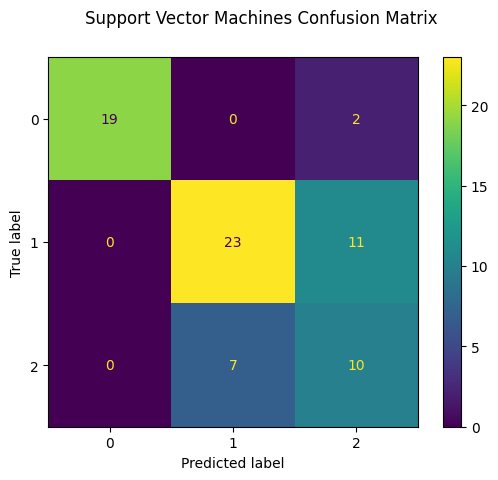

In [24]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics

clf = SVC()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("Support Vector Machines Confusion Matrix")
plt.show()

## Decision Trees

Spend a little time learning about decision tree classifiers.

I've copied the KNN code from above to get you started...modify it to run a decision tree classifier, and inspect the results.

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        34
           2       1.00      1.00      1.00        17

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72


Confusion matrix:
[[20  1  0]
 [ 1 33  0]
 [ 0  0 17]]


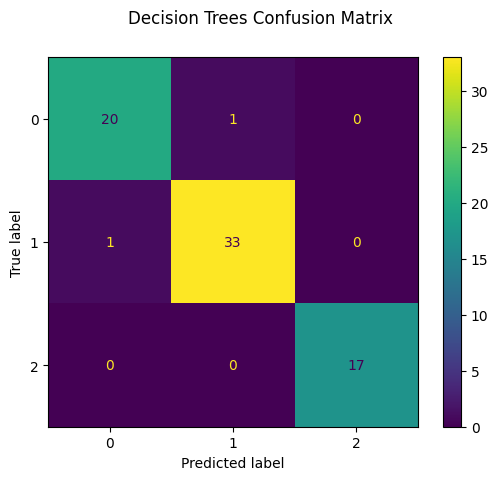

In [25]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("Decision Trees Confusion Matrix")
plt.show()

## Random Forest Classifiers

Spend a little time learning about random forest classifiers.

I've copied the KNN code from above to get you started...modify it to run a random forest classifier, and inspect the results.

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        17

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


Confusion matrix:
[[21  0  0]
 [ 0 34  0]
 [ 0  0 17]]


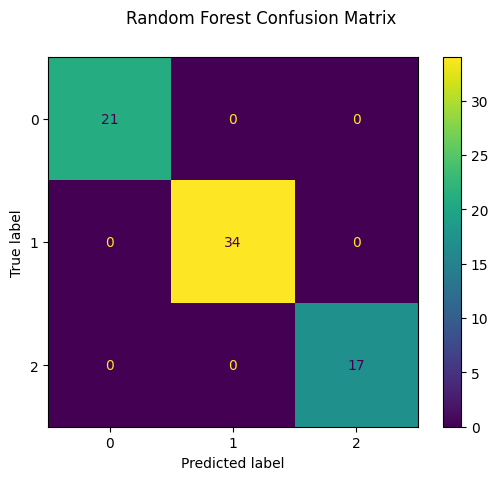

In [26]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("Random Forest Confusion Matrix")
plt.show()

## Questions

Compare and contrast the performance of the classifiers. Which do you think is best, and which worst? Are there any patterns? Anything else interesting to report?

## My Answer
The classifier's performance seemed to get progressively better as we migrated through the ranks of classifiers ending at the Random Forest.  The Random Forest clearly had the best performance with an F-1 score ~10% than the next closest competitor.  The worst performer was the Support Vector Machines, but that may have been because I didn't adjust any of the values from the default values.

All classifiers seemed to struggle the most with classifying versicolor, possibly because it was hard to separate from the virginica across most of the pairwise comparisons.

---

Was there a pattern to the changes you needed to make?  What does that say about the design of the `scikit-learn` estimators and APIs?

## My Answer
I did not change any of the classifier constructor parameters at all and they managed to do a halfway decent job most of the time.  This speaks to the design of the scikit-learn library and how well it was thought out.

---

## Follow-up

Go back to the train/test split step, and change the `random_state` value.  Rerun the classifiers and inspect the results.  Do this several times for several `random_state` values.  What do you observe?

## My Answer

I noticed occasional large changes in F-1 score.

---

What does this imply about the training process?

## My Answer

I think this means that the classifier needs lots more data for it to stabilize and have more predictable performance

---

What is `random_state` doing?

## My Answer

From what I read it seems to be a seed value for a random number generator, which results in a difference in how much the data points are shuffled around for randomizing the order in which the classifier gets the training data?

---

What should you do to ensure your ML results are reproducible?

## My Answer

To ensure results are reproducible you should initialize your classifier with the same seed value each time.

**MAKE SURE YOU SAVE, COMMIT, AND PUSH YOUR NOTEBOOKS TO YOUR REPO!!**